## Decision Tree

In [2]:
# A Decision Tree is a supervised machine learning algorithm commonly used for classification and regression tasks. 
# It works by splitting data into subsets based on feature values, following a tree-like model of decisions.
# The tree starts with a root node representing the entire dataset, which then branches out into internal nodes and leaf nodes based on decision rules applied to specific features.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Load the Excel file
excel_file = 'heart_disease.xlsx'
sheet_name = 'Sheet1'  

In [6]:
# List all sheet names
sheet_names = pd.ExcelFile('heart_disease.xlsx').sheet_names
print("Available sheets:", sheet_names)

Available sheets: ['Description', 'Heart_disease']


In [9]:
# Read the 'Heart_disease' sheet
df = pd.read_excel(excel_file, sheet_name='Heart_disease')

In [11]:
# Save the DataFrame as a CSV file
csv_file = 'heart_disease.csv'
df.to_csv(csv_file, index=False)

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [16]:
df.shape

(908, 13)

In [18]:
df.size

11804

In [20]:
# Get summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [22]:
# Get summary statistics for numeric columns
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [24]:
# Check for missing values in each column
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [26]:
mean_oldpeak = df['oldpeak'].mean()
mean_oldpeak

0.8912529550827422

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

<Axes: >

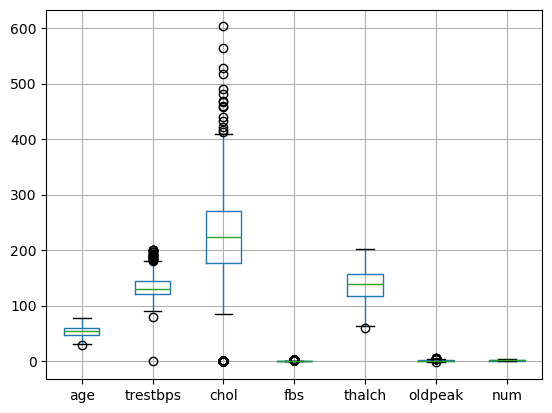

In [32]:
df.boxplot()

In [34]:
Q1A=df['age'].quantile(0.25)
Q3A=df['age'].quantile(0.75)
IQRA=Q3A-Q1A
print(Q1A,Q3A,IQRA)

47.75 60.0 12.25


In [36]:
lower_extremeA=Q1A-1.5*IQRA
upper_extremeA=Q3A+1.5*IQRA
print(lower_extremeA,upper_extremeA)

29.375 78.375


In [38]:
df_age_outliers= df[(df['age']<lower_extremeA) | (df['age']>upper_extremeA)]
df_age_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
134,29,Male,atypical angina,130,204,False,lv hypertrophy,202,False,0.0,upsloping,normal,0


In [40]:
df_age_no_outliers= df[(df['age']>=lower_extremeA) & (df['age']<=upper_extremeA)]
df_age_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [42]:
Q1t=df['trestbps'].quantile(0.25)
Q3t=df['trestbps'].quantile(0.75)
IQRt=Q3t-Q1t
print(Q1t,Q3t,IQRt)

120.0 144.0 24.0


In [44]:
lower_extremet=Q1t-1.5*IQRt
upper_extremet=Q3t+1.5*IQRt
print(lower_extremet,upper_extremet)

84.0 180.0


In [46]:
df_tbps_outliers= df[(df['trestbps']<lower_extremet) | (df['trestbps']>upper_extremet)]
df_tbps_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
190,53,Male,asymptomatic,80,0,True,normal,141,True,2.0,downsloping,reversable defect,0
243,39,Male,atypical angina,190,241,False,normal,106,False,0.0,flat,normal,0
383,63,Female,atypical angina,181,0,False,normal,87,True,NaN,flat,reversable defect,0
384,74,Male,non-anginal,188,0,False,normal,132,FALSE,NaN,flat,reversable defect,0
387,45,Male,non-anginal,193,236,False,normal,188,True,NaN,flat,fixed defect,0
396,55,Male,non-anginal,196,406,False,st-t abnormality,72,True,NaN,downsloping,fixed defect,0
487,54,Male,atypical angina,192,283,False,lv hypertrophy,195,False,0.0,upsloping,reversable defect,1
488,63,Male,asymptomatic,185,0,False,normal,98,True,0.0,upsloping,reversable defect,1
589,54,Male,asymptomatic,200,198,False,normal,142,True,2.0,flat,normal,1
766,69,Male,asymptomatic,184,236,True,normal,131,True,NaN,flat,fixed defect,2


In [48]:
df_tbps_no_outliers= df[(df['trestbps']>=lower_extremet) & (df['trestbps']<=upper_extremet)]
df_tbps_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [50]:
Q1c=df['chol'].quantile(0.25)
Q3c=df['chol'].quantile(0.75)
IQRc=Q3c-Q1c
print(Q1c,Q3c,IQRc)

176.75 270.0 93.25


In [52]:
lower_extremec=Q1c-1.5*IQRc
upper_extremec=Q3c+1.5*IQRc
print(lower_extremec,upper_extremec)

36.875 409.875


In [54]:
df_chol_outliers= df[(df['chol']<lower_extremec) | (df['chol']>upper_extremec)]
df_chol_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
74,65,Female,non-anginal,140,417,True,lv hypertrophy,157,False,0.8,upsloping,normal,0
147,43,Female,non-anginal,150,439,False,normal,175,False,0.0,upsloping,normal,0
152,56,Male,non-anginal,120,0,False,normal,97,False,0.0,flat,reversable defect,0
157,67,Female,non-anginal,115,564,False,lv hypertrophy,160,False,1.6,flat,reversable defect,0
176,60,Male,asymptomatic,120,0,False,normal,133,True,2.0,upsloping,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,43,Male,asymptomatic,115,0,False,normal,145,True,2.0,flat,reversable defect,4
895,55,Male,asymptomatic,120,0,False,st-t abnormality,92,False,0.3,upsloping,reversable defect,4
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4


In [56]:
df_chol_no_outliers= df[(df['chol']>=lower_extremec) & (df['chol']<=upper_extremec)]
df_chol_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,61,Male,asymptomatic,190,287,True,lv hypertrophy,150,True,2.0,downsloping,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [58]:
Q1t=df['thalch'].quantile(0.25)
Q3t=df['thalch'].quantile(0.75)
IQRt=Q3t-Q1t
print(Q1t,Q3t,IQRt)

118.0 156.0 38.0


In [60]:
lower_extremet=Q1t-1.5*IQRt
upper_extremet=Q3t+1.5*IQRt
print(lower_extremet,upper_extremet)

61.0 213.0


In [62]:
df_thalch_outliers=df[(df['thalch']<lower_extremet) | (df['thalch']>upper_extremet)]
df_thalch_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
676,51,Male,asymptomatic,140,0,False,normal,60,False,0.0,flat,normal,2


In [64]:
df_thalch_no_outliers=df[(df['thalch']>=lower_extremet) & (df['thalch']<=upper_extremet)]
df_thalch_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [66]:
Q1o=df['oldpeak'].quantile(0.25)
Q3o=df['oldpeak'].quantile(0.75)
IQRo=Q3o-Q1o
print(Q1o,Q3o,IQRo)

0.0 1.5 1.5


In [68]:
lower_extremeo=Q1o-1.5*IQRo
upper_extremeo=Q3o+1.5*IQRo
print(lower_extremeo,upper_extremeo)

-2.25 3.75


In [70]:
df_oldpeak_outliers=df[(df['oldpeak']<lower_extremeo) | (df['oldpeak']>upper_extremeo)]
df_oldpeak_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
149,59,Male,typical angina,178,270,False,lv hypertrophy,145,False,4.2,downsloping,reversable defect,0
525,46,Male,asymptomatic,100,0,False,st-t abnormality,133,False,-2.6,flat,reversable defect,1
537,52,Male,asymptomatic,160,246,False,st-t abnormality,82,True,4.0,flat,normal,1
587,50,Male,asymptomatic,140,231,False,st-t abnormality,140,True,5.0,flat,normal,1
722,63,Male,asymptomatic,140,187,False,lv hypertrophy,144,True,4.0,upsloping,reversable defect,2
773,61,Male,asymptomatic,120,282,False,st-t abnormality,135,True,4.0,downsloping,fixed defect,3
792,62,Female,asymptomatic,160,164,False,lv hypertrophy,145,False,6.2,downsloping,reversable defect,3
794,55,Male,asymptomatic,140,217,False,normal,111,True,5.6,downsloping,reversable defect,3
795,56,Female,asymptomatic,200,288,True,lv hypertrophy,133,True,4.0,downsloping,reversable defect,3
814,51,Male,asymptomatic,140,298,False,normal,122,True,4.2,flat,reversable defect,3


In [72]:
df_oldpeak_no_outliers=df[(df['oldpeak']>=lower_extremeo) & (df['oldpeak']<=upper_extremeo)]
df_oldpeak_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,normal,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [74]:
Q1n=df['num'].quantile(0.25)
Q3n=df['num'].quantile(0.75)
IQRn=Q3n-Q1n
print(Q1n,Q3n,IQRn)

0.0 2.0 2.0


In [76]:
lower_extremen=Q1n-1.5*IQRn
upper_extremen=Q3n+1.5*IQRn
print(lower_extremen,upper_extremen)

-3.0 5.0


In [78]:
df_num_outliers=df[(df['num']<lower_extremen) | (df['num']>upper_extremen)]
df_num_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [80]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
target=df[['restecg']]
target

,restecg
0,lv hypertrophy
1,normal
2,normal
3,lv hypertrophy
4,normal
...,...
903,normal
904,st-t abnormality
905,lv hypertrophy
906,st-t abnormality


In [84]:
features=df.drop(columns='restecg')
features

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,105,True,NaN,downsloping,fixed defect,4


In [86]:
cat_col = [i for i in features.columns if features[i].dtype=='O']
cat_col

['sex', 'cp', 'exang', 'slope', 'thal']

In [88]:
num_col = [i for i in features.columns if features[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

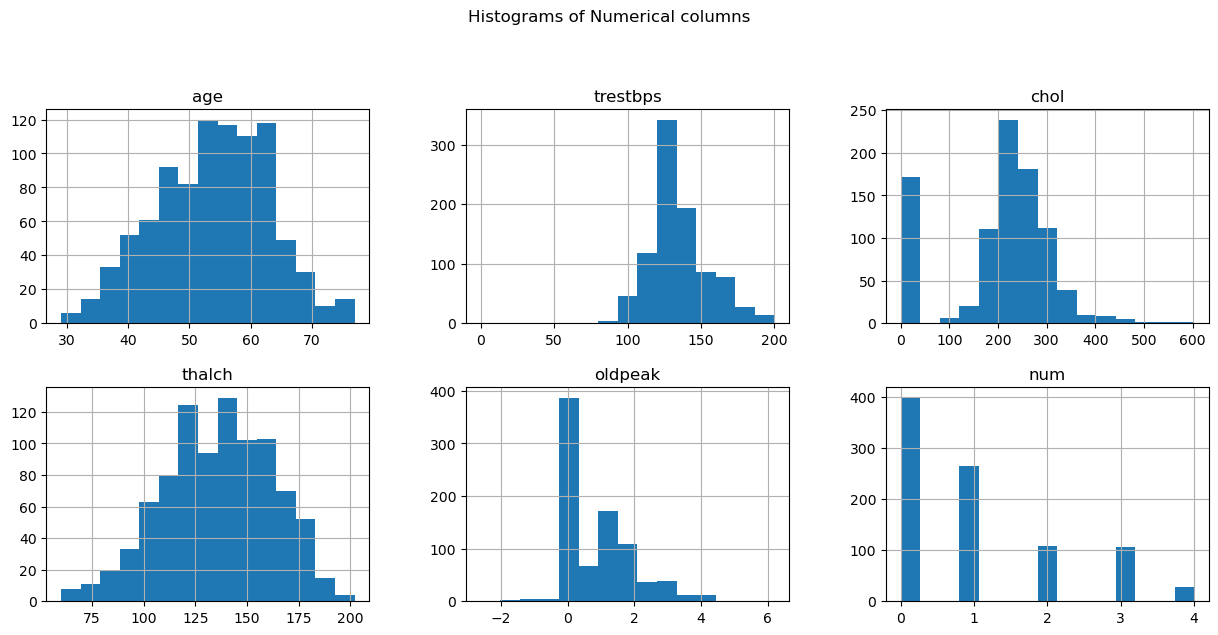

In [90]:
# Plot histograms for each numerical column
df[num_col].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical columns")
plt.show()

In [91]:
target.value_counts()

restecg         
normal              542
lv hypertrophy      187
st-t abnormality    179
dtype: int64

In [92]:
# Compute the correlation matrix
correlation_matrix = df.corr()

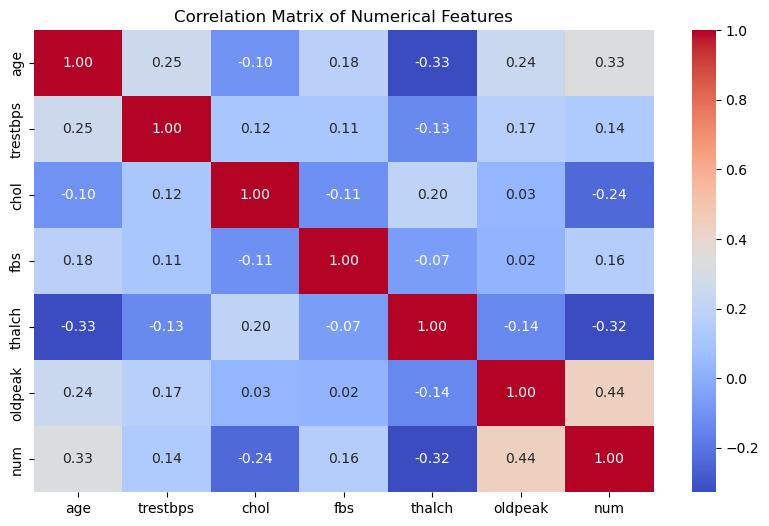

In [96]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [97]:
features[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,True,150,2.3,0
1,41,135,203,False,132,0.0,0
2,57,140,192,False,148,0.4,0
3,52,118,186,False,190,0.0,0
4,57,110,201,False,126,1.5,0
...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4
904,62,166,170,False,120,3.0,4
905,56,170,0,False,123,2.5,4
906,56,144,208,True,105,NaN,4


In [100]:
features[cat_col]

,sex,cp,exang,slope,thal
0,Male,typical angina,False,downsloping,fixed defect
1,Male,atypical angina,False,flat,fixed defect
2,Male,asymptomatic,False,flat,fixed defect
3,Male,typical angina,False,flat,fixed defect
4,Male,asymptomatic,True,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,False,upsloping,normal
904,Male,asymptomatic,True,flat,reversable defect
905,Male,non-anginal,True,downsloping,fixed defect
906,Male,non-anginal,True,downsloping,fixed defect


In [102]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [104]:
ord_enc= make_pipeline(OrdinalEncoder())

In [106]:
transformer= ColumnTransformer([('ord',ord_enc,cat_col)])

In [108]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['sex', 'cp', 'exang', 'slope', 'thal'])])>

In [110]:
features.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [121]:
for column in df.select_dtypes(include='bool').columns:
    df[column] = df[column].astype(str)

In [123]:
for column in df.columns:
    if df[column].dtype == 'object' and any(df[column].apply(lambda x: isinstance(x, bool))):
        df[column] = df[column].astype(str)

In [127]:
# Convert all boolean columns to strings to ensure compatibility with encoders
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(str)

In [129]:
# Function to check data types within each column
for column in df.columns:
    unique_types = df[column].apply(type).unique()
    if len(unique_types) > 1:
        print(f"Column '{column}' has mixed types: {unique_types}")

In [131]:
# Convert columns with mixed types to string if needed
for column in df.columns:
    if len(df[column].apply(type).unique()) > 1:
        df[column] = df[column].astype(str)

In [139]:
df1 = pd.DataFrame(transformer.fit_transform(df))
df1

,0,1,2,3,4
0,1.0,3.0,2.0,0.0,0.0
1,1.0,1.0,2.0,1.0,0.0
2,1.0,0.0,2.0,1.0,0.0
3,1.0,3.0,2.0,1.0,0.0
4,1.0,0.0,4.0,1.0,0.0
...,...,...,...,...,...
903,1.0,0.0,2.0,2.0,1.0
904,1.0,0.0,4.0,1.0,2.0
905,1.0,2.0,4.0,0.0,0.0
906,1.0,2.0,4.0,0.0,0.0


In [145]:
simple_impute1=SimpleImputer(missing_values=np.nan,strategy='median')

In [147]:
df2=pd.DataFrame(simple_impute1.fit_transform(features[num_col]))

In [149]:
stand_sca = StandardScaler()

In [151]:
df2=pd.DataFrame(stand_sca.fit_transform(df2))

In [153]:
df2

,0,1,2,3,4,5,6
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [155]:
features1=pd.concat([df1,df2],axis=1,ignore_index=True)
features1
old_name=range(0,5)
new_name=cat_col
old_name1=range(5,12)
new_name1=num_col
features1=features1.rename(columns=dict(zip(old_name,new_name)))
features1

,sex,cp,exang,slope,thal,5,6,7,8,9,10,11
0,1.0,3.0,2.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,1.0,1.0,2.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,1.0,0.0,2.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,1.0,3.0,2.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,1.0,0.0,4.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,2.0,2.0,1.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,1.0,0.0,4.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,1.0,2.0,4.0,0.0,0.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,1.0,2.0,4.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [157]:
features1=features1.rename(columns=dict(zip(old_name1,new_name1)))
features1


,sex,cp,exang,slope,thal,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1.0,3.0,2.0,0.0,0.0,1.006027,0.567394,0.281297,1.976894,0.524183,1.354403,-0.881977
1,1.0,1.0,2.0,1.0,0.0,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.815718,-0.881977
2,1.0,0.0,2.0,1.0,0.0,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.438305,-0.881977
3,1.0,3.0,2.0,1.0,0.0,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.815718,-0.881977
4,1.0,0.0,4.0,1.0,0.0,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.599578,-0.881977
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.0,0.0,2.0,2.0,1.0,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.599578,2.615119
904,1.0,0.0,4.0,1.0,2.0,0.896773,1.597292,-0.281021,-0.505844,-0.595631,2.014874,2.615119
905,1.0,2.0,4.0,0.0,0.0,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.543109,2.615119
906,1.0,2.0,4.0,0.0,0.0,0.241249,0.518352,0.058155,1.976894,-1.155538,-0.343952,2.615119


In [159]:
x_train,x_test,y_train,y_test= train_test_split(features1,target,train_size=0.75,random_state=100)

In [161]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(681, 12)
(227, 12)
(681, 1)
(227, 1)


In [163]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)

In [165]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [167]:
y_pred= dec_tree.predict(x_test)

In [169]:
y_pred

array(['normal', 'normal', 'normal', 'normal', 'lv hypertrophy', 'normal',
       'normal', 'lv hypertrophy', 'normal', 'normal', 'st-t abnormality',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'st-t abnormality', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'st-t abnormality',
       'normal', 'normal', 'st-t abnormality', 'normal', 'normal',
       'normal', 'normal', 'st-t abnormality', 'normal', 'normal',
       'normal', 'lv hypertrophy', 'normal', 'normal', 'normal', 'normal',
       'lv hypertrophy', 'normal', 'normal', 'normal', 'st-t abnormality',
       'normal', 'lv hypertrophy', 'normal', 'normal', 'normal', 'normal',
       'st-t abnormality', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'lv hypertrophy',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal

In [171]:
accuracy_score(y_test,y_pred)

0.5154185022026432

In [173]:
precision_score(y_test,y_pred,average='weighted')

0.4262518163157045

In [175]:
recall_score(y_test,y_pred,average='weighted')

0.5154185022026432

In [177]:
f1_score(y_test,y_pred,average='weighted')

0.4416079143142923

In [179]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6]}

In [181]:
grid_search= GridSearchCV(dec_tree,params)

In [183]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [185]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [187]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

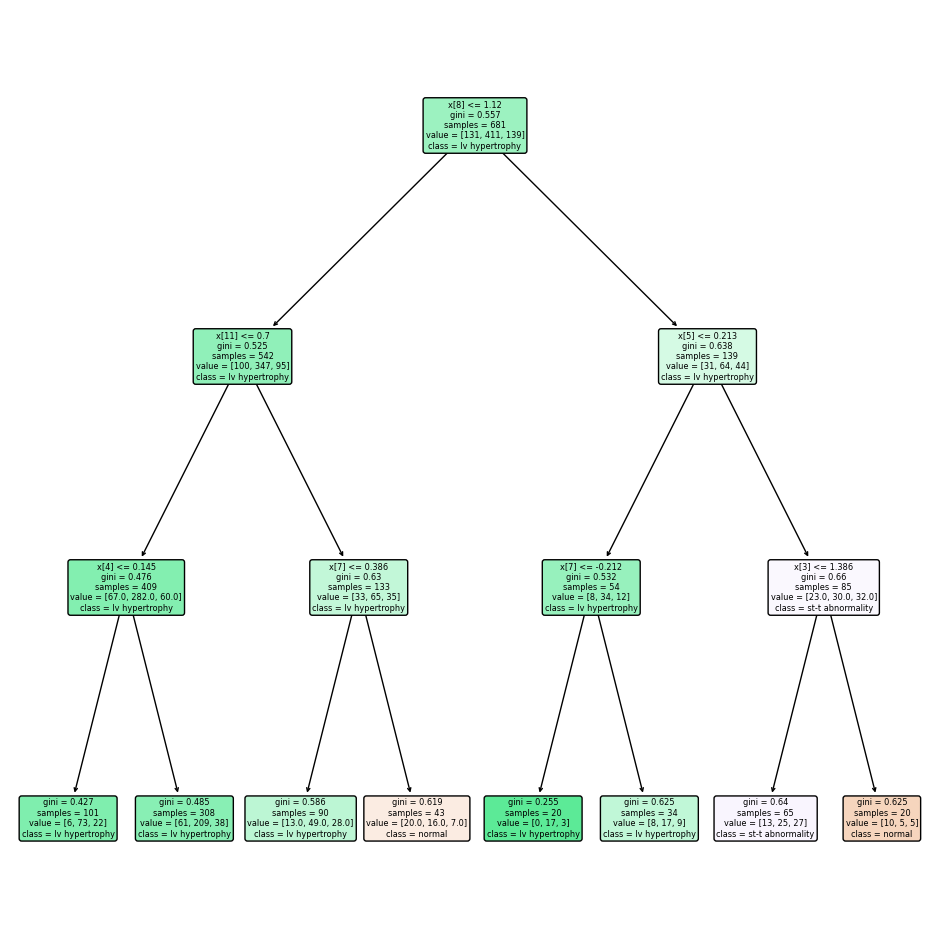

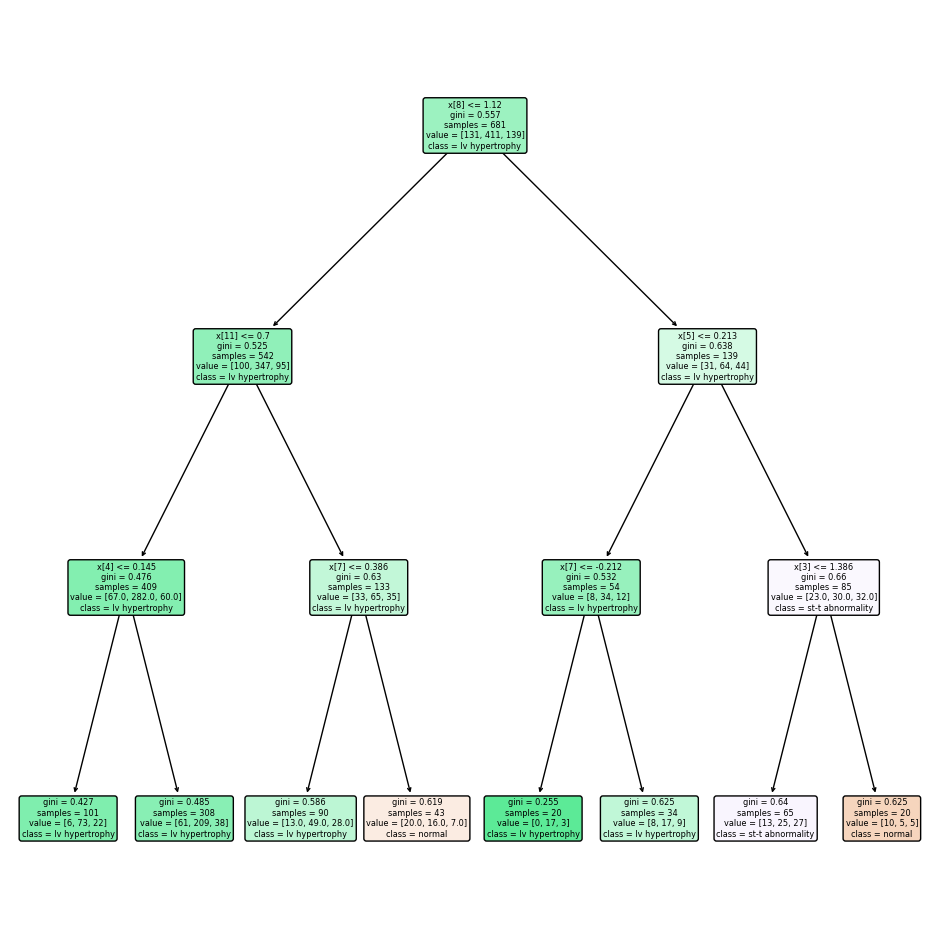

In [195]:
#plot the decision tree
plt.figure(figsize=(12,12))
plot_tree(dec_tree,filled=True,max_depth=3,rounded=True,class_names=['normal','lv hypertrophy','st-t abnormality']);
plt.show()